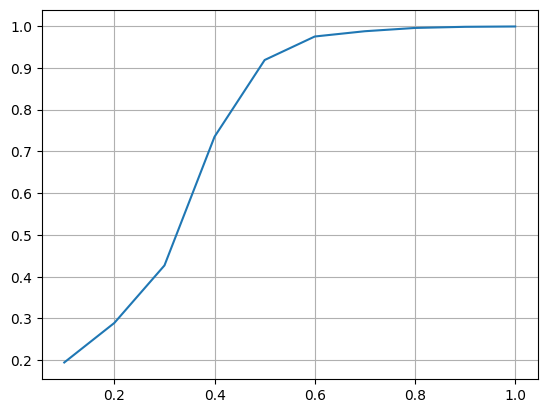

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
L = 5  # 이차원 격자의 크기 L
N = L**2  # 격자의 총 스핀 수
betas = np.arange(0.1, 1.1, 0.1)  # 베타 값 범위
num_steps = 1000  # 시뮬레이션 스텝 수

def swendsen_wang_step(spins, p):
    np.random.shuffle(bonds)

    # Union-Find 구조 초기화
    global ptr
    ptr = -np.ones(N, dtype=int)

    # 클러스터 형성
    for bond in bonds:
        s1, s2 = bond
        if spins[s1] == spins[s2] and np.random.rand() < p:
            union(s1, s2)

    # 클러스터 뒤집기
    flipped = set()
    for i in range(N):
        root = find(i)
        if root not in flipped:
            if np.random.rand() < 0.5:
                cluster = [j for j in range(N) if find(j) == root]
                for site in cluster:
                    spins[site] *= -1
            flipped.add(root)

    return spins

# 가장 가까운 이웃들 간의 본드 초기화
bonds = []
for i in range(L):
    for j in range(L):
        current = i * L + j
        right = i * L + (j + 1) % L  # 오른쪽 이웃 스핀 인덱스
        down = ((i + 1) % L) * L + j  # 아래 이웃 스핀 인덱스
        bonds.append((current, right))
        bonds.append((current, down))

# Union-Find 함수 정의
def find(x):
    if ptr[x] < 0:
        return x
    else:
        ptr[x] = find(ptr[x])
        return ptr[x]

def union(r1, r2):
    root1 = find(r1)
    root2 = find(r2)
    if root1 != root2:
        if ptr[root1] < ptr[root2]:  # root1이 더 큰 트리를 가지고 있을 경우
            ptr[root1] += ptr[root2]
            ptr[root2] = root1
        else:
            ptr[root2] += ptr[root1]
            ptr[root1] = root2

average_abs_magnetizations = []

# 각 베타 값에 대해 시뮬레이션 수행
for beta in betas:
    p = 1 - np.exp(-2 * beta)  # 확률 p 계산
    magnetizations = []

    # 초기 스핀 설정
    spins = np.random.choice([-1, 1], size=N)

    # 주어진 스텝 수만큼 시뮬레이션 진행
    for _ in range(num_steps):
        spins = swendsen_wang_step(spins, p)
        magnetization = np.abs(np.mean(spins))  # 절대 자화율 계산
        magnetizations.append(magnetization)

    average_abs_magnetizations.append(np.mean(magnetizations))

# 결과 그래프 플로팅
plt.plot(betas, average_abs_magnetizations)
plt.grid(True)
plt.xlabel('Beta')
plt.ylabel('Average Absolute Magnetization')
plt.title('Average Absolute Magnetization vs Beta')
plt.show()


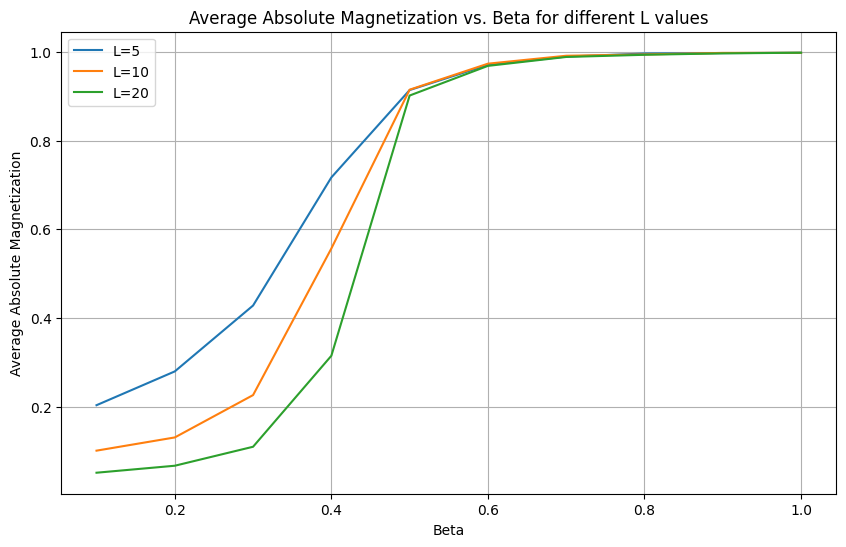

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
L_values = [5, 10, 20]  # 격자 크기 L 값들
betas = np.arange(0.1, 1.1, 0.1)  # 베타 값 범위
num_steps = 1000  # 시뮬레이션 스텝 수

def swendsen_wang_step(spins, p, bonds):
    np.random.shuffle(bonds)

    # Union-Find 구조 초기화
    global ptr
    ptr = -np.ones(len(spins), dtype=int)

    # 클러스터 형성
    for bond in bonds:
        s1, s2 = bond
        if spins[s1] == spins[s2] and np.random.rand() < p:
            union(s1, s2)

    # 클러스터 뒤집기
    flipped = set()
    for i in range(len(spins)):
        root = find(i)
        if root not in flipped:
            if np.random.rand() < 0.5:
                cluster = [j for j in range(len(spins)) if find(j) == root]
                for site in cluster:
                    spins[site] *= -1
            flipped.add(root)

    return spins

# Union-Find 함수 정의
def find(x):
    if ptr[x] < 0:
        return x
    else:
        ptr[x] = find(ptr[x])
        return ptr[x]

def union(r1, r2):
    root1 = find(r1)
    root2 = find(r2)
    if root1 != root2:
        if ptr[root1] < ptr[root2]:  # root1이 더 큰 트리를 가지고 있을 경우
            ptr[root1] += ptr[root2]
            ptr[root2] = root1
        else:
            ptr[root2] += ptr[root1]
            ptr[root1] = root2

# 그래프 설정
plt.figure(figsize=(10, 6))

# 각 L 값에 대해 시뮬레이션 수행 및 그래프 그리기
for L in L_values:
    N = L**2  # 격자의 총 스핀 수
    average_abs_magnetizations = []

    # 가장 가까운 이웃들 간의 본드 초기화
    bonds = []
    for i in range(L):
        for j in range(L):
            current = i * L + j
            right = i * L + (j + 1) % L  # 오른쪽 이웃 스핀 인덱스
            down = ((i + 1) % L) * L + j  # 아래 이웃 스핀 인덱스
            bonds.append((current, right))
            bonds.append((current, down))

    for beta in betas:
        p = 1 - np.exp(-2 * beta)
        magnetizations = []

        # 초기 스핀 설정
        spins = np.random.choice([-1, 1], size=N)

        # 주어진 스텝 수만큼 시뮬레이션 진행
        for _ in range(num_steps):
            spins = swendsen_wang_step(spins, p, bonds)
            magnetization = np.abs(np.mean(spins))  # 절대 자화율 계산
            magnetizations.append(magnetization)

        average_abs_magnetizations.append(np.mean(magnetizations))

    # 그래프 그리기
    plt.plot(betas, average_abs_magnetizations, label=f'L={L}')

plt.xlabel('Beta')
plt.ylabel('Average Absolute Magnetization')
plt.title('Average Absolute Magnetization vs. Beta for different L values')
plt.legend()
plt.grid(True)
plt.show()
